# Titanic dataset

In [1]:
#Import the labraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.metrics import classification_report

# Load the dataset

In [2]:
#import the dataset
df=pd.read_csv('C:\\Users\\PMLS\\Favorites\\Machine learning &classification\\titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.head() #gives the first 5 lines

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.tail()#gives the last 5 lines


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Checks the uniques values

In [7]:
for col in df.columns:
    print(f"Unique values in {col}: {df[col].unique()}")

Unique values in PassengerId: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Checks the outliers

<Axes: ylabel='Age'>

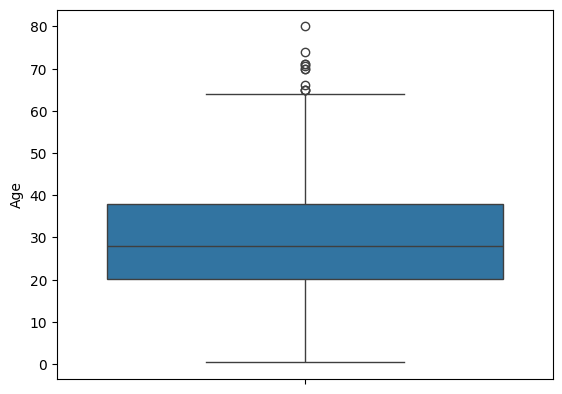

In [10]:
sns.boxplot(df['Age'])

In [11]:
#  we can handle the outliers by IQR method  and one by one
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print("Lower Limit:", lower_limit)
print("Upper Limit:", upper_limit)

# Cap outliers (recommended)
df['Age'] = np.where(df['Age'] < lower_limit, lower_limit,
                                  np.where(df['Age'] > upper_limit, upper_limit, df['Age']))


Lower Limit: -6.6875
Upper Limit: 64.8125


<Axes: ylabel='Age'>

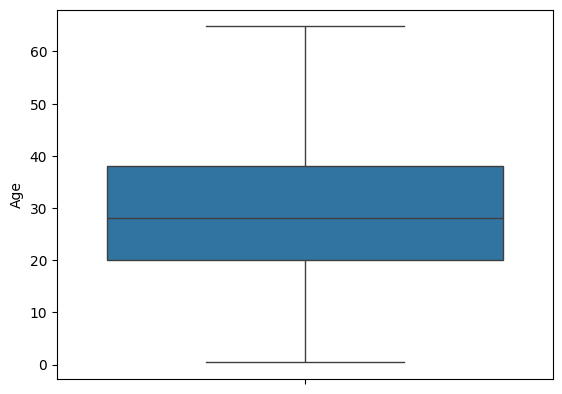

In [12]:
sns.boxplot(df['Age'])

<Axes: ylabel='SibSp'>

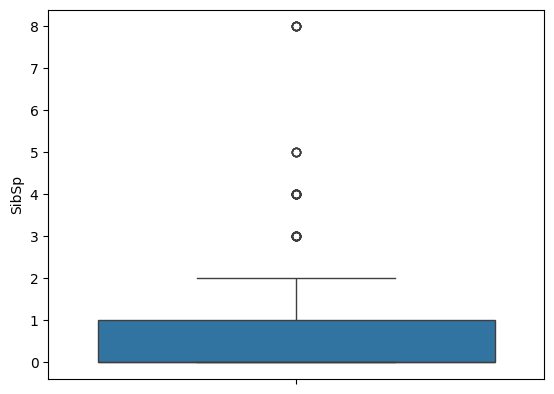

In [13]:
sns.boxplot(df['SibSp'])

In [14]:
#  we can handle the outliers by IQR method  and one by one
Q1 = df['SibSp'].quantile(0.25)
Q3 = df['SibSp'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print("Lower Limit:", lower_limit)
print("Upper Limit:", upper_limit)

# Cap outliers (recommended)
df['SibSp'] = np.where(df['SibSp'] < lower_limit, lower_limit,
                                  np.where(df['SibSp'] > upper_limit, upper_limit, df['SibSp']))


Lower Limit: -1.5
Upper Limit: 2.5


<Axes: ylabel='SibSp'>

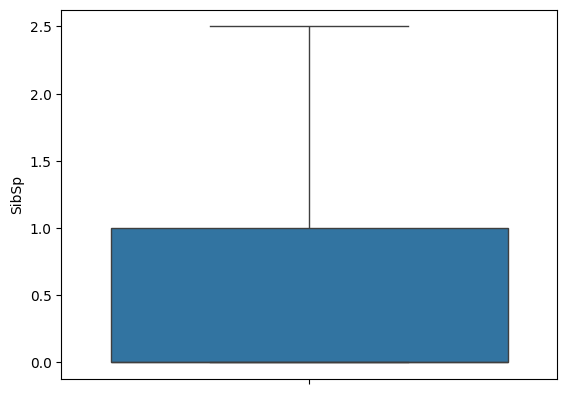

In [15]:
sns.boxplot(df['SibSp'])

<Axes: ylabel='Parch'>

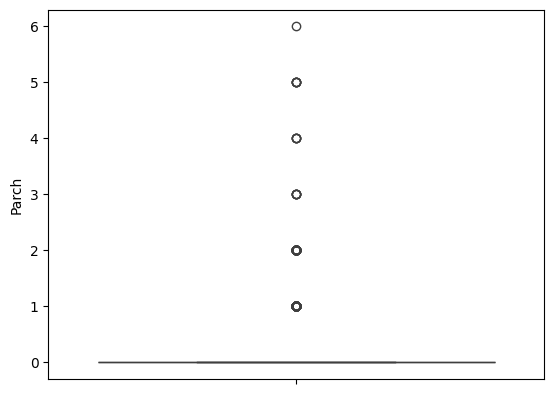

In [16]:
sns.boxplot(df['Parch'])

In [17]:
#  we can handle the outliers by IQR method  and one by one
Q1 = df['Parch'].quantile(0.25)
Q3 = df['Parch'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print("Lower Limit:", lower_limit)
print("Upper Limit:", upper_limit)

# Cap outliers (recommended)
df['Parch'] = np.where(df['Parch'] < lower_limit, lower_limit,
                                  np.where(df['Parch'] > upper_limit, upper_limit, df['Parch']))


Lower Limit: 0.0
Upper Limit: 0.0


<Axes: ylabel='Parch'>

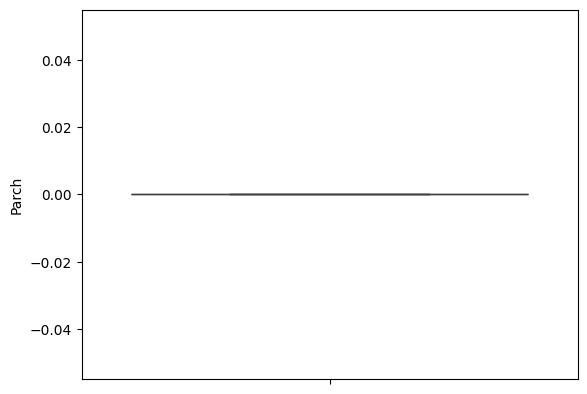

In [18]:
sns.boxplot(df['Parch'])

# Counts values

In [19]:
# checks the counts values of every columns
for col in df.columns:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())



Column: PassengerId
PassengerId
891    1
1      1
2      1
3      1
4      1
      ..
16     1
15     1
14     1
13     1
12     1
Name: count, Length: 891, dtype: int64

Column: Survived
Survived
0    549
1    342
Name: count, dtype: int64

Column: Pclass
Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Column: Name
Name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
                                                      ..
Hewlett, Mrs. (Mary D Kingcome)                        1
Vestrom, Miss. Hulda Amanda Adolfina                   1
Andersson, Mr. Anders Johan                            1
Saundercock, Mr. William Henry                         1
Bonnell, Miss. Elizabeth                               1
Name: count, Length: 891, dtype: int

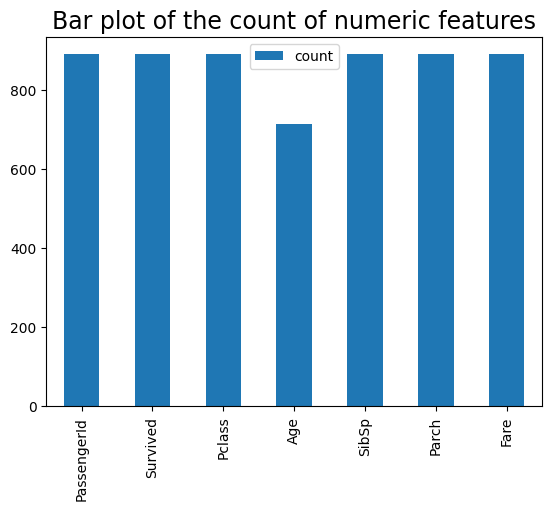

In [20]:
# makes the graphs 
dfT=df.describe().T
dfT['count']=df.count()# add a count column manually

dfT.plot.bar(y='count')
plt.title("Bar plot of the count of numeric features",fontsize=17)
plt.show()

C:\Users\PMLS\AppData\Local\Temp\ipykernel_15316\2271557996.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived',data=df,palette='RdBu_r')


<Axes: xlabel='Survived', ylabel='count'>

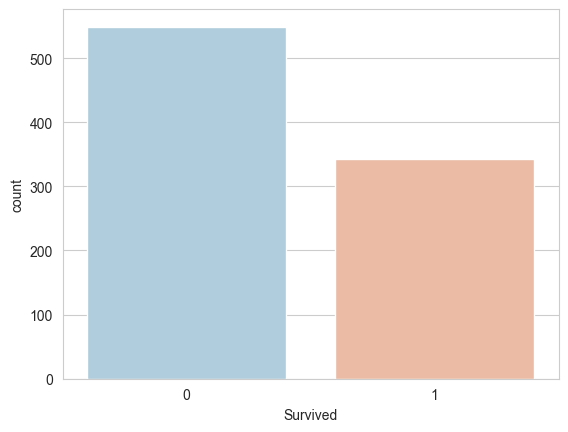

In [21]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df,palette='RdBu_r')

C:\Users\PMLS\AppData\Local\Temp\ipykernel_15316\1113711306.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived',data=df,palette='RdBu_r')


<Axes: xlabel='Survived', ylabel='count'>

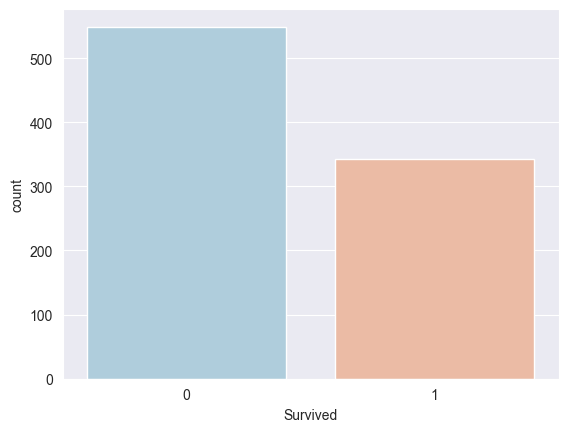

In [22]:
sns.set_style('darkgrid')
sns.countplot(x='Survived',data=df,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

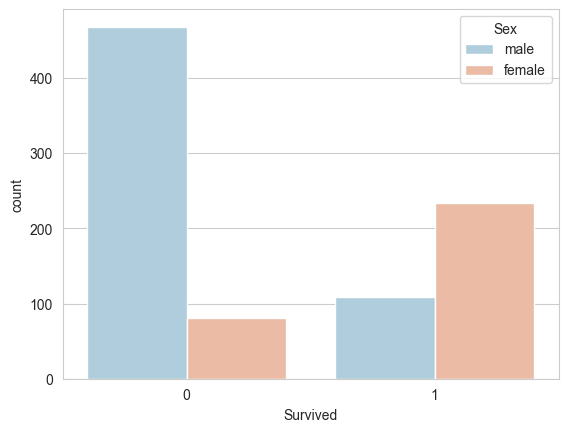

In [23]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',palette='RdBu_r',data=df,hue='Sex')

<Axes: xlabel='Survived', ylabel='count'>

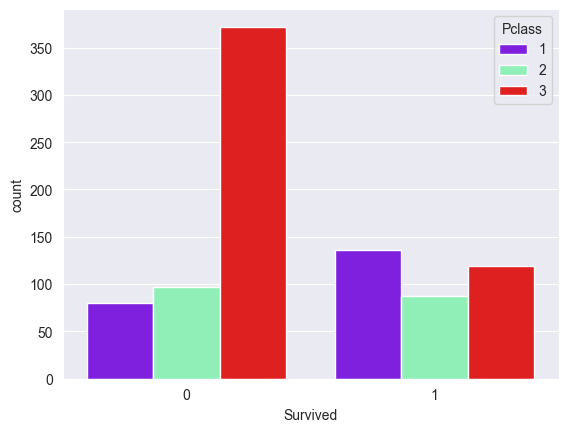

In [24]:
sns.set_style('darkgrid')
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')

<Axes: xlabel='Survived', ylabel='count'>

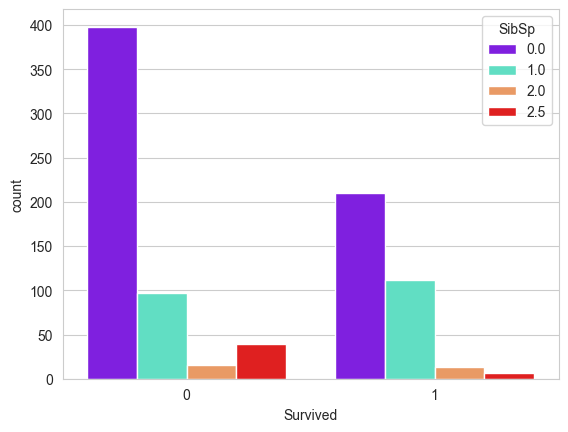

In [25]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='SibSp',data=df,palette='rainbow')

<Axes: title={'center': 'Age histogram of the passengers'}, xlabel='Age of the passengers', ylabel='Count'>

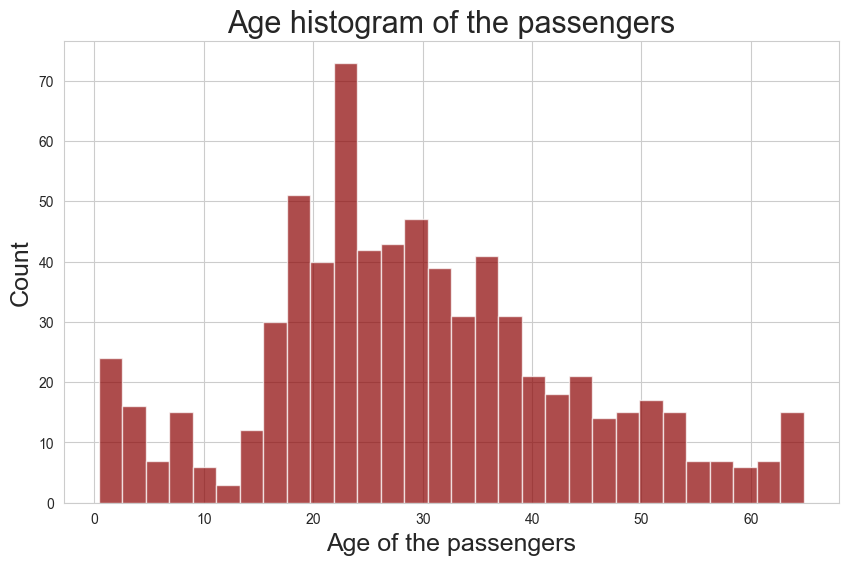

In [26]:
plt.xlabel("Age of the passengers",fontsize=18)
plt.ylabel("Count",fontsize=18)
plt.title("Age histogram of the passengers",fontsize=22)
df['Age'].hist(bins=30,color='darkred',alpha=0.7,figsize=(10,6))

Text(0.5, 0, 'Passenger class')

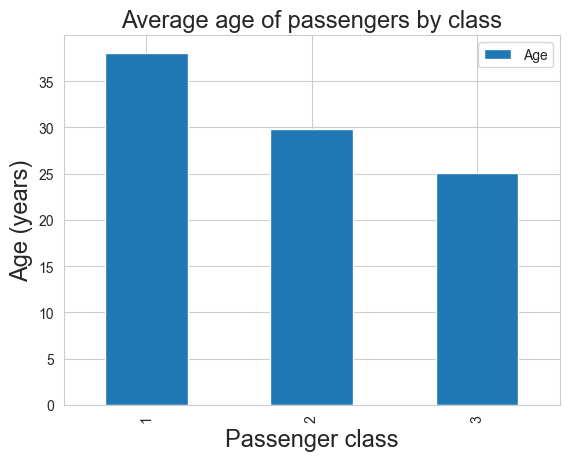

In [27]:
f_class_Age=df.groupby('Pclass')['Age'].mean()
f_class_Age=pd.DataFrame(f_class_Age)
f_class_Age
f_class_Age.plot.bar(y='Age')
plt.title("Average age of passengers by class",fontsize=17)
plt.ylabel("Age (years)", fontsize=17)
plt.xlabel("Passenger class", fontsize=17)

Text(0.5, 1.0, 'Bar plot of the count of numeric features')

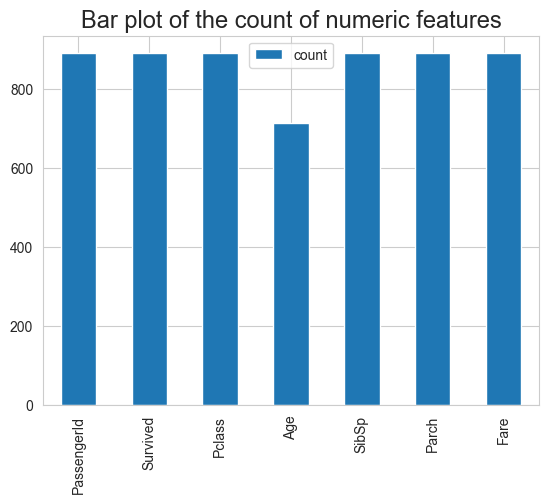

In [28]:
df['Age'] 
df1=df.describe()
dfT=df1.T
dfT.plot.bar(y='count')
plt.title("Bar plot of the count of numeric features",fontsize=17)

# Check the missing values

In [29]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [30]:
 df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked'] = df['Embarked'].astype('object')
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [31]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [32]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [33]:
# drops the features
df1=df.drop(columns=['Name','Ticket','Cabin'],axis=1)

In [34]:
df1['Sex'] = df1['Sex'].map({'male': 0, 'female': 1}).astype(int)
df1['Embarked'] = df1['Embarked'].map({'S': 0, 'C': 1,'Q':2}).astype(int)
df1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1.0,0.0,7.2500,0
1,2,1,1,1,38.0,1.0,0.0,71.2833,1
2,3,1,3,1,26.0,0.0,0.0,7.9250,0
3,4,1,1,1,35.0,1.0,0.0,53.1000,0
4,5,0,3,0,35.0,0.0,0.0,8.0500,0


In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    float64
 6   Parch        891 non-null    float64
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 62.8 KB


# Split the data

In [36]:
X = df1.drop(columns=['Survived'])  # Replace 'target_column' with your actual target variable
y = df1['Survived']  # Extract target values


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print("Training set shape",X_train.shape)
print("Test set shape",X_test.shape)

Training set shape (712, 8)
Test set shape (179, 8)


In [38]:
#we apply standard scaler on training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test) 

In [39]:
# we apply smote function 
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)
print("\nAfter SMOTE:")
print(X_train_res.shape, y_train_res.shape)


After SMOTE:
(888, 8) (888,)


# Train the model

In [40]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)
# predict the model
pred=model.predict(X_test)


from sklearn.metrics import accuracy_score,precision_score,f1_score
print('accuracu_score:',accuracy_score(y_test,pred))
print('precision_score:',precision_score(y_test,pred))
print('f1_score:',f1_score(y_test,pred))

accuracu_score: 0.7932960893854749
precision_score: 0.7605633802816901
f1_score: 0.7448275862068966


C:\Users\PMLS\anaconda3\envs\MLlearning\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
model1=DecisionTreeClassifier()
model1.fit(X_train,y_train)
pred1=model1.predict(X_test)

from sklearn.metrics import accuracy_score,precision_score,f1_score
print('accuracu_score:',accuracy_score(y_test,pred1))
print('precision_score:',precision_score(y_test,pred1))
print('f1_score:',f1_score(y_test,pred1))

accuracu_score: 0.7653631284916201
precision_score: 0.7285714285714285
f1_score: 0.7083333333333334


In [44]:
model2=RandomForestClassifier()
model2.fit(X_train,y_train)

pred2=model2.predict(X_test)

from sklearn.metrics import accuracy_score,precision_score,f1_score
print('accuracu_score:',accuracy_score(y_test,pred2))
print('precision_score:',precision_score(y_test,pred2))
print('f1_score:',f1_score(y_test,pred2))

accuracu_score: 0.8379888268156425
precision_score: 0.8260869565217391
f1_score: 0.7972027972027972
